# <b>`COMPARAR AMBOS CODIGOS y HACER UNOS BIEN QUYE ISRVA`

# **Dashboard**

## 1. Install Required Libraries

Since Google Colab doesn’t natively support Dash, we need to install dash and jupyter-dash.

In [1]:
!pip install dash
!pip install jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.8 MB/s eta 0:00:00


## 2. Import Required Libraries

In [2]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash

## 3. Download the Dataset and Skeleton App

In [3]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv"
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py"

--2024-10-17 14:19:12--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_dash.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2476 (2.4K) [text/csv]
Saving to: ‘spacex_launch_dash.csv’

spacex_launch_dash. 100%[===================>]   2.42K  --.-KB/s    in 0s      

2024-10-17 14:19:12 (763 MB/s) - ‘spacex_launch_dash.csv’ saved [2476/2476]

--2024-10-17 14:19:13--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_3/spacex_dash_app.py
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-sto

## 4. Load the Dataset into a Dataframe

In [4]:
spacex_df = pd.read_csv('spacex_launch_dash.csv')

In [8]:
# Display the Dataset
'''
spacex_df.head()
'''
spacex_df.tail()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
51,51,48,CCAFS SLC-40,0,4230.0,F9 FT B1032.2,FT
52,52,50,CCAFS SLC-40,0,6092.0,F9 B4 B1044,B4
53,53,52,CCAFS SLC-40,0,2647.0,F9 B4 B1039.2,B4
54,54,53,CCAFS SLC-40,1,362.0,F9 B4 B1045.1,B4
55,55,56,CCAFS SLC-40,0,5384.0,F9 B4 B1040.2,B4


## 4. Build the Dashboard

In [5]:
## Initialize the App

# Create Dash App
app = JupyterDash(__name__)

# To handle dynamic components
app.config.suppress_callback_exceptions = True
# What does this mean?
# `suppress_callback_exceptions = True` allows handling callbacks that depend on components not yet present in the layout.

/usr/local/lib/python3.10/dist-packages/dash/dash.py:585: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
'''
## App Layout

app.layout = html.Div(children=[
    # `html.Div()`: Defines a division or section on the page.
    # `children=`: Contains all the components like html.H1, dcc.Dropdown, and graphs inside the Div. Allows to add one or multiple components (such as dcc.Dropdown, dcc.Graph, etc.) inside that container. Without children, it would only allow a single element. It's called children because it's a list of child components within the parent Div.

    # Title
    html.H1('SpaceX Launch Records', style={'textAlign': 'center', 'color': '#ff0000', 'font-size': 20}),
    # Dropdown Menus -> Task 1: Add a dropdown for Launch Site
    dcc.Dropdown(id='site-dropdown',
                 options=[
                     {'label': 'All Sites', 'value': 'ALL'},
                     {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                     {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                     {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                     {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                 ],
                 value='ALL',
                 placeholder="Select a Launch Site",
                 searchable=True
    ),
    html.Br(),  # `html.Br()`: Adds vertical space between elements, similar to how the <br> HTML tag works in web development.

    # Pie chart for the success rate
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    # TASK 3: Add a slider for payload range
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(id='payload-slider',
                    min=0, max=10000, step=1000,
                    marks={0: '0 Kg', 2500: '2500 Kg', 5000: '5000 Kg', 7500: '7500 Kg', 10000: '10000 Kg'},
                    value=[spacex_df['Payload Mass (kg)'].min(), spacex_df['Payload Mass (kg)'].max()]),

    # Scatter plot for payload vs. outcome
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add callback to update pie chart based on selected site
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    filtered_df = spacex_df
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class',
                     names='Launch Site',
                     title='Total Success Launches by Site')
    else:
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(filtered_df,
                     names='class',
                     title=f'Total Success vs. Failed Launches for {entered_site}')
    return fig

# TASK 4: Add callback to update scatter plot based on selected site and payload range
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')]
)
def update_scatter_plot(entered_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= low) & (spacex_df['Payload Mass (kg)'] <= high)]

    if entered_site != 'ALL':
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]

    fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                     color='Booster Version',
                     title='Payload vs. Outcome for Selected Site(s)')
    return fig

In [6]:
# App layout with dropdown, range slider, and two graphs (pie chart and scatter plot)
app.layout = html.Div(children=[
    html.H1('SpaceX Launch Records Dashboard', style={'textAlign': 'center'}),

    # TASK 1: Add a dropdown for Launch Site
    dcc.Dropdown(id='site-dropdown',
                 options=[
                     {'label': 'All Sites', 'value': 'ALL'},
                     {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                     {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                     {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                     {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                 ],
                 value='ALL',
                 placeholder="Select a Launch Site",
                 searchable=True
    ),
    html.Br(),

    # Pie chart for the success rate
    html.Div(dcc.Graph(id='success-pie-chart')),
    html.Br(),

    # TASK 3: Add a slider for payload range
    html.P("Payload range (Kg):"),
    dcc.RangeSlider(id='payload-slider',
                    min=0, max=10000, step=1000,
                    marks={0: '0 Kg', 2500: '2500 Kg', 5000: '5000 Kg', 7500: '7500 Kg', 10000: '10000 Kg'},
                    value=[spacex_df['Payload Mass (kg)'].min(), spacex_df['Payload Mass (kg)'].max()]),

    # Scatter plot for payload vs. outcome
    html.Div(dcc.Graph(id='success-payload-scatter-chart')),
])

# TASK 2: Add callback to update pie chart based on selected site
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown', component_property='value')
)
def get_pie_chart(entered_site):
    if entered_site == 'ALL':
        # Create a pie chart that shows the success/failure for each launch site
        fig = px.pie(spacex_df,
                     values='class',
                     names='Launch Site',
                     title='Total Success Launches for All Sites',
                     color='class',
                     color_discrete_map={0: 'red', 1: 'green'})
    else:
        # Filter the dataframe for the selected site and show success vs failure
        filtered_df = spacex_df[spacex_df['Launch Site'] == entered_site]
        success_fail_counts = filtered_df.groupby('class').size().reset_index(name='counts')
        fig = px.pie(success_fail_counts, values='counts',
                     names='class',
                     title=f'Total Success vs. Failure Launches for {entered_site}',
                     color='class',
                     color_discrete_map={0: 'red', 1: 'green'})

    return fig

# TASK 4: Add callback to update scatter plot based on selected site and payload range
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'),
     Input(component_id='payload-slider', component_property='value')]
)
def update_scatter_plot(entered_site, payload_range):
    low, high = payload_range
    filtered_df = spacex_df[(spacex_df['Payload Mass (kg)'] >= low) & (spacex_df['Payload Mass (kg)'] <= high)]

    if entered_site != 'ALL':
        filtered_df = filtered_df[filtered_df['Launch Site'] == entered_site]

    fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class',
                     color='Booster Version',
                     title='Payload vs. Outcome for Selected Site(s)')
    return fig

In [7]:
'''
# Run the app
app.run_server(mode='inline')
'''
# Start the server
app.run_server(debug=True)

<IPython.core.display.Javascript object>

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

# **Exam**

1. How can you add marking objects such as circles, markers, or lines on a Folium map? (Click all choices that apply)
add_node(map, object)
,
map.add_to(object)
,
map.add_child(object)
or
object.add_to(map)
2. If you want to add multiple markers with similar coordinates on the Folium map, which Folium plugin you should use?
Markers should be add to map directly without any extra layer
,
MarkerCluster
,
MarkerContainer
or
MarkerGroup
3. Which attribute is used to provide available selections (such as a list of launch sites) for a Plotly DropDown input?
input
,
options
,
placeholder
or
values
4. How can we associate the result of a callback function (like a Ploty figure) to an element defined in the application layout?
Using a unique component id
,
Using component name
or
Dash automatically render the result of a callback function
5. Can we add multiple input components to a dash callback function (2 pts)?
Yes
or
No

How can you add marking objects such as circles, markers, or lines on a Folium map?

Correct answers:
map.add_child(object)
object.add_to(map)
If you want to add multiple markers with similar coordinates on the Folium map, which Folium plugin should you use?

Correct answer: MarkerCluster
Which attribute is used to provide available selections (such as a list of launch sites) for a Plotly DropDown input?

Correct answer: options
How can we associate the result of a callback function (like a Plotly figure) to an element defined in the application layout?

Correct answer: Using a unique component id
Can we add multiple input components to a Dash callback function?

Correct answer: Yes

# Color Picker

ColorPicker(value='#503D36', description='Pick a Color')

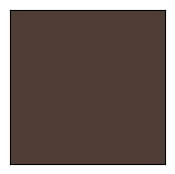

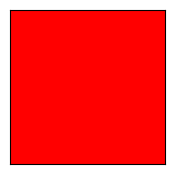

In [14]:
# Install Required Libraries
!pip install ipywidgets

# Import Required Libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Create a color picker widget
color_picker = widgets.ColorPicker(
    concise=False,
    description='Pick a Color',
    value='#503D36',  # Default color value
    disabled=False
)

# Function to display the selected color
def display_color(color):
    # Display a simple rectangle of the selected color
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.set_facecolor(color)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

# Event listener to update the color display
def on_color_change(change):
    display_color(change['new'])

# Add the listener to the color picker
color_picker.observe(on_color_change, names='value')

# Display the color picker
display(color_picker)

# Initial display of the default color
display_color(color_picker.value)
